<a href="https://colab.research.google.com/github/blackxhrt2102/Classification-Prediction-Capstone-Project/blob/main/Cardiovasular_disease_risk_prediction(Rahul_Jha).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Cardiovascular Risk Analysis 
 **The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,
Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD). The dataset provides the patients’ information. It includes
over 4,000 records and 15 attributes.
Variables
Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.**

# Column description:-
* **Sex**: male or female("M" or "F")
* **Age**: Age of the patient;(Continuous - Although the recorded ages have been truncated to
whole numbers, the concept of age is continuous)
Behavioral
* **is_smoking**: whether or not the patient is a current smoker ("YES" or "NO")
* **Cigs Per Day**: the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)
Medical( history)
* **BP Meds**: whether or not the patient was on blood pressure medication (Nominal)
* **Prevalent Stroke**: whether or not the patient had previously had a stroke (Nominal)
* **Prevalent Hyp**: whether or not the patient was hypertensive (Nominal)
* **Diabetes**: whether or not the patient had diabetes (Nominal)
Medical(current)
* **Tot Chol**: total cholesterol level (Continuous)
* **Sys BP**: systolic blood pressure (Continuous)
* **Dia BP**: diastolic blood pressure (Continuous)
* **BMI**: Body Mass Index (Continuous)
* **Heart Rate**: heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)
* **Glucose**: glucose level (Continuous)
Predict variable (desired target)
* **10-year risk of coronary heart disease CHD** 
(binary: “1”, means “Yes”, “0” means “No”) -
DV

**1.1 Importing Modules**

In [61]:
# Basic modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Manupulation
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold,cross_val_score,GridSearchCV,RepeatedStratifiedKFold

# Classification Algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

#-------------------------------------
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE


sns.set_style('darkgrid')

**1.2 Loading Dataset**

In [62]:
# Since id column is same as index so replacing it to index value only:-

df=pd.read_csv('/content/data_cardiovascular_risk.csv',index_col='id')   

**1.3 Data Understanding**

In [63]:
# Printing first few rows of dataset

df.head(4) 

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1


In [64]:
# Data Type and non missing value of columns:-

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 450.2+ KB


In [65]:
# Statistical description of dataset

df.describe()

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [66]:
# Name of the columns 

print('Name of the columns:-')
df.columns

Name of the columns:-


Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

# 2.  EDA (Exploratory Data Analysis)

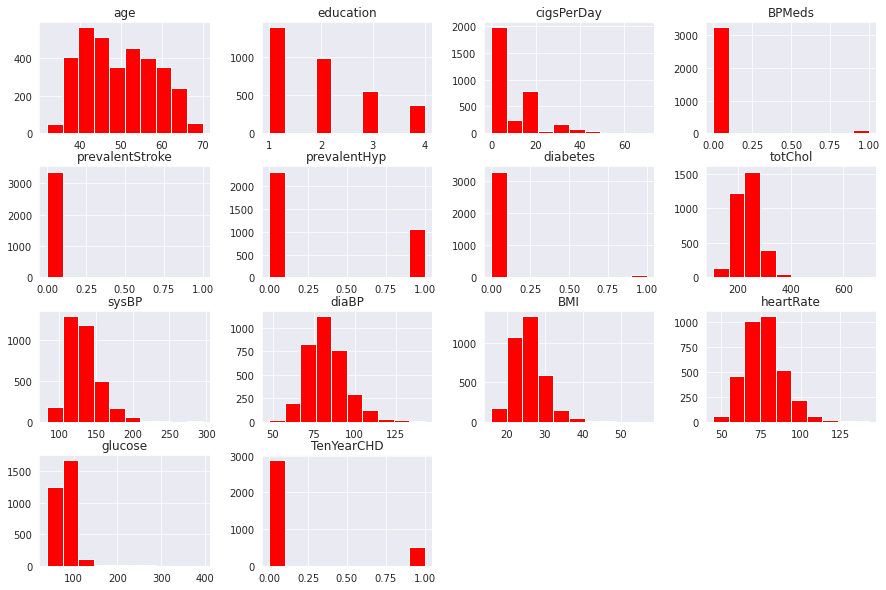

-> Here we can easily draw insight about continuous and descrete value


In [67]:
# Histogram of all columns 

df.hist(figsize=(15,10),color='red')  
plt.show()
print('-> Here we can easily draw insight about continuous and descrete value')

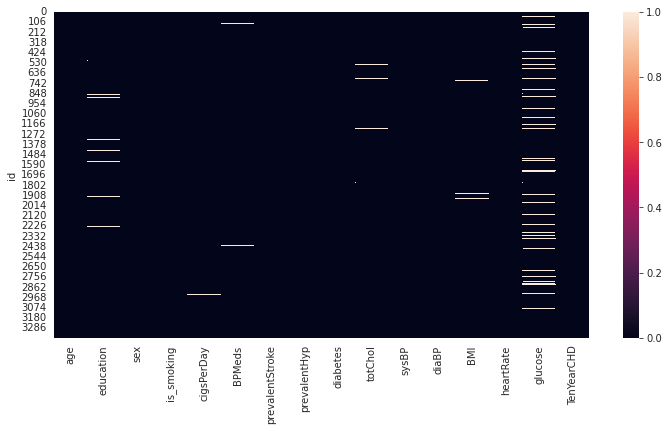

Missing value of columns;
 age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64


In [68]:
# Number of missing value

plt.figure(figsize=(12,6))
sns.heatmap(df.isnull())
plt.show()

print('Missing value of columns;\n',df.isnull().sum())

**2.1. Data Visualization on Univariate Variable**

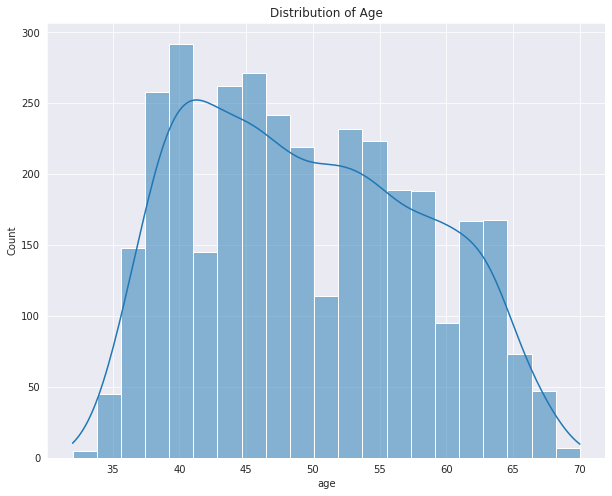

Skewness of the distribution:-> 0.2257958756715891
Kurtosis of the distribution:-> -1.0048018900322173


In [69]:
# Histogram of Age columns:-

plt.figure(figsize=(10,8))
sns.histplot(df['age'],kde=True).set(title='Distribution of Age')
plt.show()

#--------------------------------------------------------------------

print('Skewness of the distribution:->',df['age'].skew())
print('Kurtosis of the distribution:->',df['age'].kurtosis())

**Conclusion:-**
* We can see a peak around age 35-40.
* The graph is left skewed (Positive skewed) with 0.2257 value.

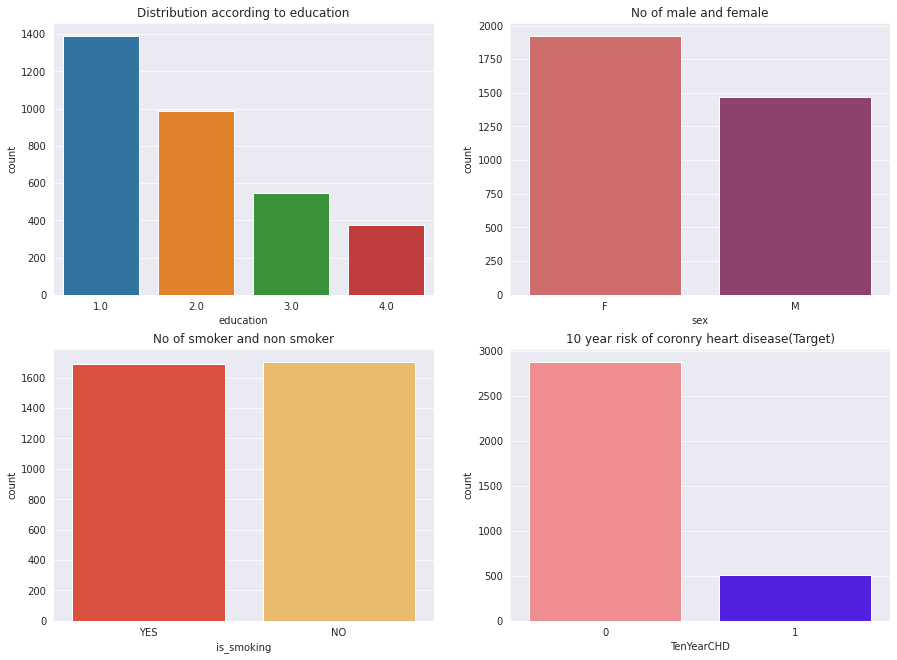

In [70]:
# Countplot of various categorical columns:-

fig,ax=plt.subplots(2,2,figsize=(15,11))

#-----------------------------------------------------------------------------------------------------------------------------------------------------------
# Education
sns.countplot(x='education',data=df,ax=ax[0,0]).set(title='Distribution according to education')

#Gender
sns.countplot(x='sex',data=df,ax=ax[0,1],palette='flare').set(title='No of male and female')

# Was smoking or not
sns.countplot(x='is_smoking',data=df,ax=ax[1,0],palette='YlOrRd_r').set(title='No of smoker and non smoker')

# Had risk of coronry disease or not
sns.countplot(x='TenYearCHD',data=df,ax=ax[1,1],palette='gnuplot2_r').set(title='10 year risk of coronry heart disease(Target)')

#------------------------------------------------------------------------------------------------------------------------------------------------------------
plt.show()

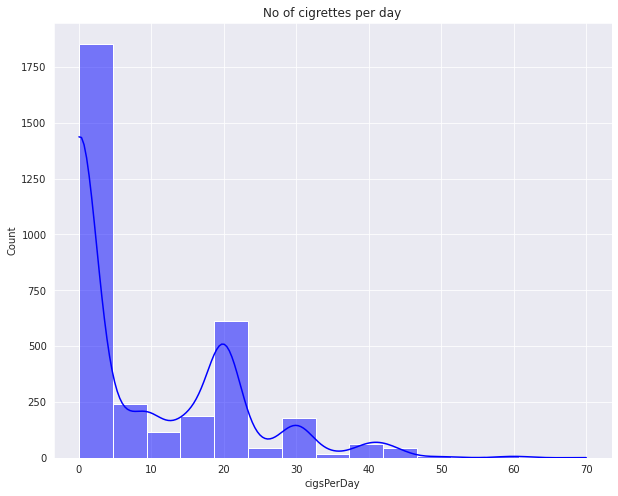

In [71]:
# No of cigrettes per day

plt.figure(figsize=(10,8))
sns.histplot(df['cigsPerDay'],bins=15,color='blue',kde=True).set(title='No of cigrettes per day')
plt.show()


* Most people drink cigrettes less than 1 or 2.
* We can see a peak around people drinking cigrettes around 20.
* There is some peaks around graph which represent there are some people drink cigrettes more than 30,40 or so....

-> About 68 % people were not hypersensitive.
0    0.684661
1    0.315339
Name: prevalentHyp, dtype: float64


->Only 3% of people was on blood pressure medication.
0.0    97.011357
1.0     2.988643
Name: BPMeds, dtype: float64


->Less than 1% people had stroke earlier.
0    99.351032
1     0.648968
Name: prevalentStroke, dtype: float64


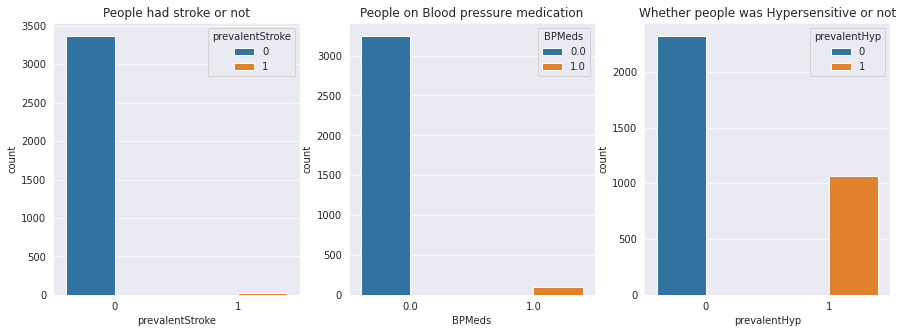

In [72]:
fig,ax=plt.subplots(1,3,figsize=(15,5))

# STROKE
sns.countplot(x='prevalentStroke',data=df,hue='prevalentStroke',ax=ax[0]).set(title='People had stroke or not')

print('-> About 68 % people were not hypersensitive.')
print(df['prevalentHyp'].value_counts(normalize=True))

#-------------------------------------------------------------------------

#  BLOOD PRESSURE 
sns.countplot(x='BPMeds',data=df,ax=ax[1],hue='BPMeds').set(title='People on Blood pressure medication')

print('\n\n->Only 3% of people was on blood pressure medication.')
print(df['BPMeds'].value_counts(normalize=True)*100)

#-----------------------------------------------------------------------------
# HYPERSENSITIVITY
sns.countplot(x='prevalentHyp',data=df,ax=ax[2],hue='prevalentHyp').set(title='Whether people was Hypersensitive or not')

print('\n\n->Less than 1% people had stroke earlier.')
print(df['prevalentStroke'].value_counts(normalize=True)*100)

#--------------------------------------------------------------------------------------
plt.show()


-> Cholestrol
Skewness of Cholestrol distribution:-> 0.9406357047700903
Kurtosis of Cholestrol distribution:-> 4.781321712560631


-> Glucose
Skewness of Glucose distribution:-> 6.1443896544049394
Kurtosis of Glucose distribution:-> 57.356963153228115


-> Heartrate
Skewness of Heartrate distribution:-> 0.6764897223370003
Kurtosis of Glucose distribution:-> 0.9796435954513374


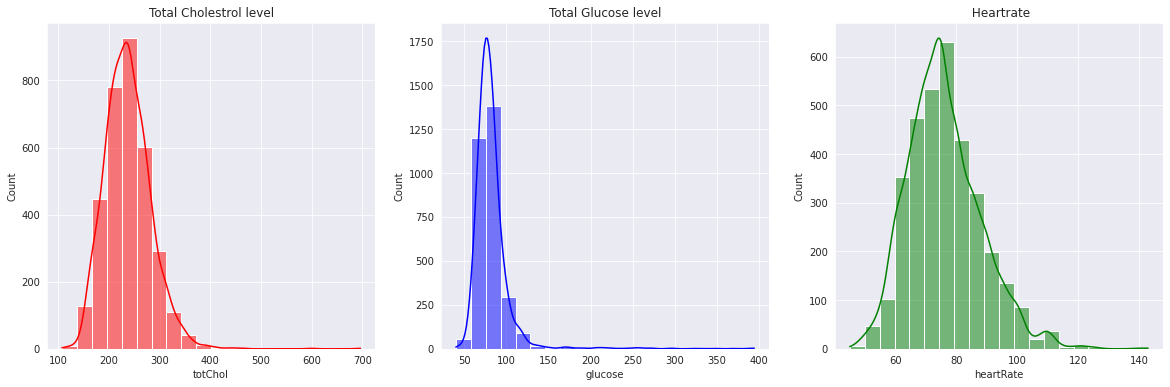

In [73]:
fig,ax=plt.subplots(1,3,figsize=(20,6))

#  Cholestrol
sns.histplot(df['totChol'],bins=20,color='red',kde=True,ax=ax[0]).set(title='Total Cholestrol level')
print('-> Cholestrol')
print('Skewness of Cholestrol distribution:->',df['totChol'].skew())
print('Kurtosis of Cholestrol distribution:->',df['totChol'].kurtosis())

#---------------------------------------------------------------------------------------------

# Glucose

sns.histplot(df['glucose'],bins=20,color='blue',kde=True,ax=ax[1]).set(title='Total Glucose level')
print('\n\n-> Glucose')
print('Skewness of Glucose distribution:->',df['glucose'].skew())
print('Kurtosis of Glucose distribution:->',df['glucose'].kurtosis())

#-----------------------------------------------------------------------------------------------------

# Heartrate

sns.histplot(df['heartRate'],bins=20,color='green',kde=True,ax=ax[2]).set(title=' Heartrate')
print('\n\n-> Heartrate')
print('Skewness of Heartrate distribution:->',df['heartRate'].skew())
print('Kurtosis of Glucose distribution:->',df['heartRate'].kurtosis())

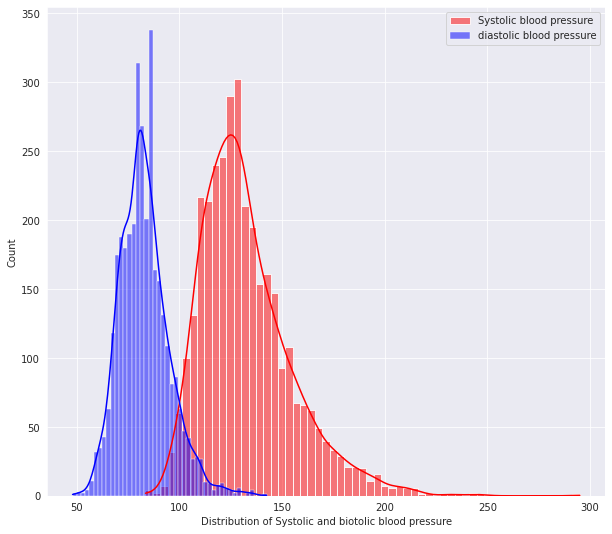

In [74]:
plt.figure(figsize=(10,9))
sns.histplot(df['sysBP'],kde=True,color='red',label='Systolic blood pressure')
sns.histplot(df['diaBP'],kde=True,color='blue',label='diastolic blood pressure')
plt.xlabel('Distribution of Systolic and biotolic blood pressure')
plt.legend()
plt.show()

**2.2  Data visualization on multivariate variable**

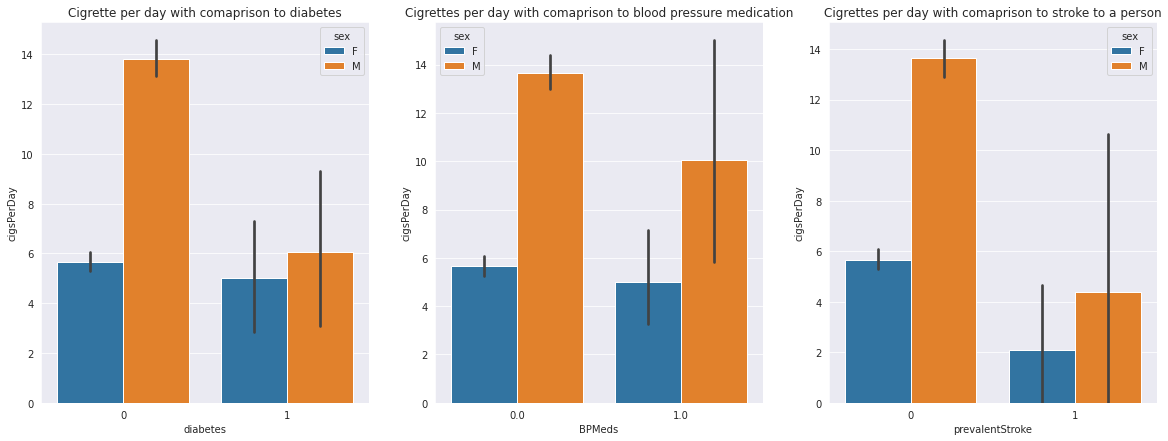

In [75]:
fig,ax=plt.subplots(1,3,figsize=(20,7))

#---  Cigretes per day vs Diabetes
sns.barplot(x='diabetes',y='cigsPerDay',data=df,hue='sex',ax=ax[0]).set(title='Cigrette per day with comaprison to diabetes')

#--- Cigrettes per day vs BP medication
sns.barplot(x='BPMeds',y='cigsPerDay',data=df,hue='sex',ax=ax[1]).set(title='Cigrettes per day with comaprison to blood pressure medication')
#------

sns.barplot(x='prevalentStroke',y='cigsPerDay',data=df,hue='sex',ax=ax[2]).set(title='Cigrettes per day with comaprison to stroke to a person')


plt.show()



**Conclusion;**
*  Men who dont have diabetes drink at least 14 cigrettes.
* In comparison,men who have blood pressure mdication drink at least 10 cigrettes per day.)
* Stroke often resist people to drink cigrettes.'




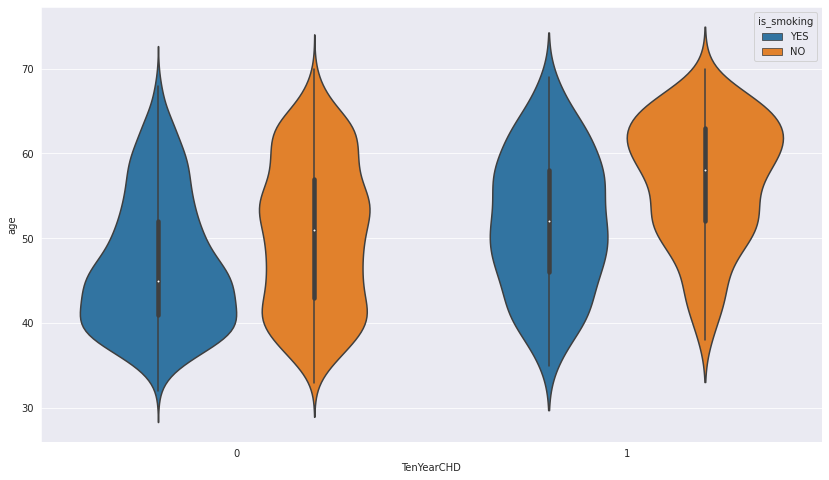

In [76]:
plt.figure(figsize=(14,8))
sns.violinplot(x='TenYearCHD',data=df,y='age',hue='is_smoking')

**Conclusion**
* People of age below 45 that drink cigrettes has less chance to have cadiovasular disease.
* It has been seen that people above age 60 who dont smoke has more chance to have cardivascular disease.
* We can conclude at last that cigrettes dosent have a major role in cardiovascular disease,as people whith lower age who drinks cigrettes has less distribution to have disease than people who are above age 60 who dosent drink.

<Figure size 1440x720 with 0 Axes>

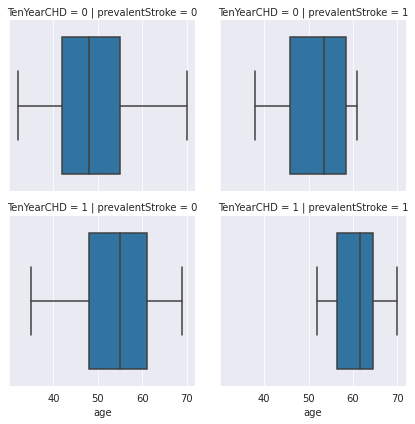

In [77]:
plt.figure(figsize=(20,10))
sns.FacetGrid(df,col='prevalentStroke',row='TenYearCHD').map(sns.boxplot,'age',order='prevalentCHD')
plt.show()

**Conclusion:-**
* People who are older above age 50 and had stroke has more chance to have cardiovascular activity.


<Figure size 1440x720 with 0 Axes>

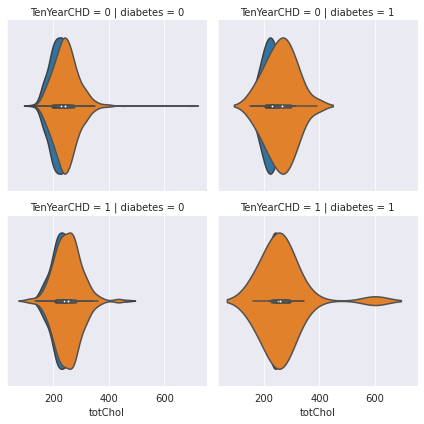

In [78]:
plt.figure(figsize=(20,10))
sns.FacetGrid(df,col='diabetes',row='TenYearCHD',hue='prevalentHyp',hue_order=[0,1]).map(sns.violinplot,'totChol',order='prevalentHyp')
plt.show()

* There ia a small distribution of people with diabetes and cholestrol above 400 has chance of cardiovasular disease

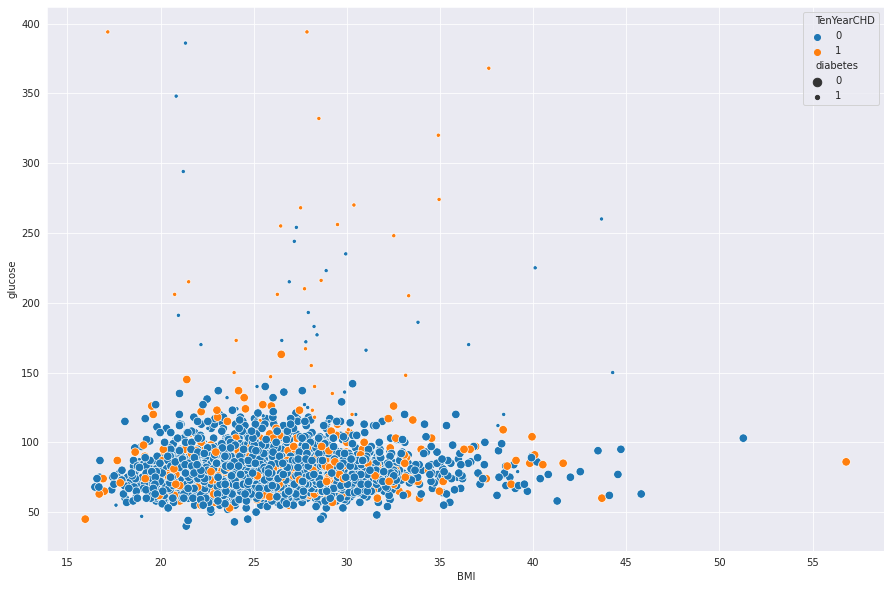

In [79]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='BMI',y='glucose',data=df,hue='TenYearCHD',size='diabetes')



*   Here we can see some orange big bubbles that represent cardiovasular disease with diabtes and glucose aranging from 75-150 with BMI distributed all over.



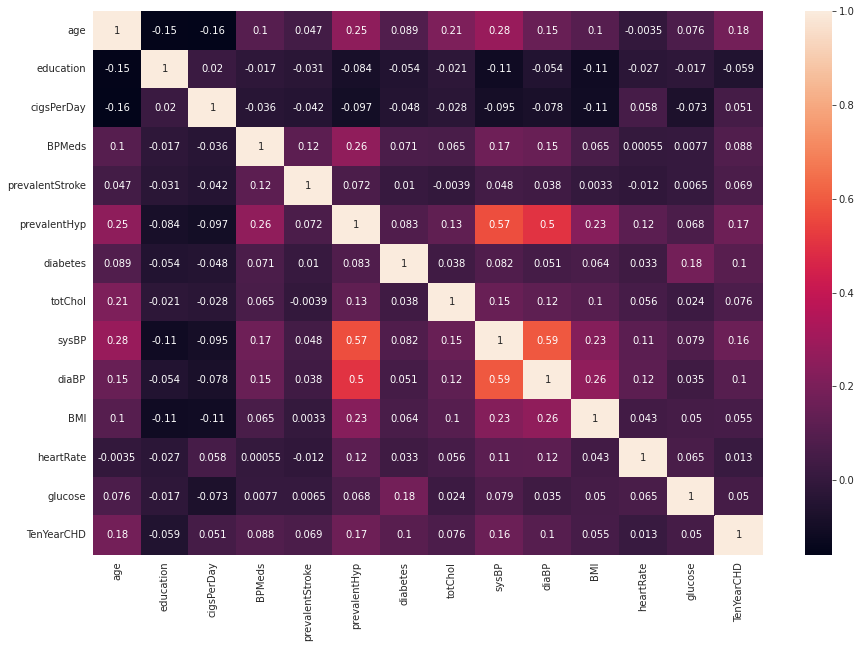

In [80]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr('kendall'),annot=True)
plt.show()

* We can see prevalentHyp is positively correlated to sysBP and diaBP.
* SysBp and diaBP is correlated with each other.



**3. Data Manululation and Cleaning**

In [81]:
#  Changing categorical to numerical

df['sex']=df['sex'].replace({'F':0,'M':1})
df['is_smoking']=df['is_smoking'].replace({'NO':1,'YES':1})

In [82]:
# Null values

df['heartRate']=df['heartRate'].fillna(df['heartRate'].median())          # Relacing null value witj median value.
#----------------------------------------------------------------------------------------
df['BMI']=df['BMI'].fillna(df['BMI'].median())
#----------------------------------------------------------------------------------------
df['totChol']=df['totChol'].fillna(df['totChol'].median())
#----------------------------------------------------------------------------------------
df['cigsPerDay']=df['cigsPerDay'].fillna(int(df['cigsPerDay'].mean()))
#----------------------------------------------------------------------------------------
df['education']=df['education'].fillna(1)
#----------------------------------------------------------------------------------------
df['BPMeds']=df['BPMeds'].fillna(0)                                       # Replacing null value with 0.

#-------------------------------------------------------------------------
a=df.groupby(['diabetes'])['glucose']                                    # We replace null value of glucose with groupby value of diabetes.
df['glucose']=df['glucose'].fillna(a.transform('mean'))

**On average, respondents in this group considered that smoking can cause cancer only if one smokes at least 19.4 cigarettes per day (for an average reported consumption of 5.5 cigarettes per day), and that cancer risk becomes high for a smoking duration of 16.9 years or more (reported average duration: 16.7)**
* So we are making a group of cigrette and cholestrol level.

In [83]:
#--------  Cigrete group on basis of its harmfullness  ----------------------
def cig_group(col):
  a=''
  if(col==0):
    a=1
  elif(col<=5):
    a=2
  elif(col<=12):
    a=3
  elif(col<=30):
    a=4
  else:
    a=5
  return a
df['cig_group']=df['cigsPerDay'].apply(cig_group)


#---------------------- Cholestrol level from normal to harmful  -------------------

def cholestral_level(col):
  a=''
  if(col<100):
    a=1
  elif(col<150):
    a=2
  elif(col<250):
    a=3
  else:
    a=4
  return a
df['cholestral_level']=df['totChol'].apply(cholestral_level)

In [84]:
#  Dropping unnecessary column:-
df.drop(['is_smoking','totChol','cigsPerDay'],axis=1,inplace=True)


In [85]:
# One hot encoding the categorical 

df=pd.get_dummies(df,columns=['education','cholestral_level','cig_group'],drop_first=True)

# 5. Model evaluation 

In [86]:
#  Imbalance dataset

df['TenYearCHD'].value_counts(normalize=True)*100

0    84.926254
1    15.073746
Name: TenYearCHD, dtype: float64



*  Target value are of ration 85:15 and it is a an imbalanced dataset to work on,so accuracy will not be a better metrics ,hence we are using roc_auc to compare.



* **5.1.Data Sampling**

In [87]:
x=df.drop('TenYearCHD',axis=1)
y=df['TenYearCHD']
xtrain,xvalid,ytrain,yvalid=train_test_split(x,y,test_size=0.3,shuffle=True)

* We have use cross validation to split the dataset as to get more info about our accuracy and to handle imbalance dataset.


* **5.2. Model Comparison**

In [88]:
models=[]
models.append(('Logistic Regression',LogisticRegression(max_iter=5000)))
models.append(('SVC',SVC()))
models.append(('Decision Tree Classifier',DecisionTreeClassifier()))
models.append(('Random Forest Classifier',RandomForestClassifier()))
models.append(('Gradient Boosting Classifier',GradientBoostingClassifier()))
models.append(('Linear Discriminant Analysis',LinearDiscriminantAnalysis()))


scores=[]
for name,model in models:
  cv=StratifiedKFold(n_splits=10,random_state=21,shuffle=True)   # To handle imbalance target we have use it.
  score=cross_val_score(model,xtrain,ytrain,cv=cv,scoring='roc_auc')
  scores.append((name,np.mean(score)))

scores

[('Logistic Regression', 0.7147387524392947),
 ('SVC', 0.6157185750945338),
 ('Decision Tree Classifier', 0.5485415484249125),
 ('Random Forest Classifier', 0.6641366719800996),
 ('Gradient Boosting Classifier', 0.6744720598011393),
 ('Linear Discriminant Analysis', 0.7117357984803105)]

**Without balancing the dataset we can clearly see that accuracy of all model is below 75%**

# 5.3. Data Balancing

In [89]:
# Using smote technique to balance the dataset:-


print("Before OverSampling, counts of 1: {}".format(sum(ytrain == 1)))
print("Before OverSampling, counts of 0: {} \n".format(sum(ytrain== 0)))



sm = SMOTE(random_state = 2)
xtrain_resample, ytrain_resample =sm.fit_resample(xtrain,ytrain)

print('After OverSampling, the shape of xtrain: {}'.format(xtrain_resample.shape))
print('After OverSampling, the shape of ytrain: {} \n'.format(ytrain_resample.shape))

print("After OverSampling, counts of label 1: {}".format(sum(ytrain_resample == 1)))
print("After OverSampling, counts of label 0: {}".format(sum(ytrain_resample == 0)))


Before OverSampling, counts of 1: 375
Before OverSampling, counts of 0: 1998 

After OverSampling, the shape of xtrain: (3996, 20)
After OverSampling, the shape of ytrain: (3996,) 

After OverSampling, counts of label 1: 1998
After OverSampling, counts of label 0: 1998


In [90]:
# After balancing comparing between different models:-

models=[]
models.append(('Logistic Regression',LogisticRegression(max_iter=5000)))
models.append(('SVC',SVC()))
models.append(('Decision Tree Classifier',DecisionTreeClassifier()))
models.append(('Random Forest Classifier',RandomForestClassifier()))
models.append(('Gradient Boosting Classifier',GradientBoostingClassifier()))
models.append(('Linear Discriminant Analysis',LinearDiscriminantAnalysis()))


scores=[]
for name,model in models:
  cv=StratifiedKFold(n_splits=10,random_state=21,shuffle=True)   # To handle imbalance target we have use it.
  score=cross_val_score(model,xtrain_resample,ytrain_resample,cv=cv,scoring='roc_auc')
  scores.append((name,np.mean(score)))

scores

[('Logistic Regression', 0.8632965703517588),
 ('SVC', 0.7125245226130653),
 ('Decision Tree Classifier', 0.7992575376884423),
 ('Random Forest Classifier', 0.9459649685929648),
 ('Gradient Boosting Classifier', 0.8973311432160805),
 ('Linear Discriminant Analysis', 0.8627021859296482)]

**After balancing RandomForest gives an accuracy of about 95%**

In [91]:
model = LogisticRegression(max_iter=5000)
model.fit(xtrain_resample, ytrain_resample)
  
predictions = model.predict(xvalid)
  
# print classification report
print(classification_report(yvalid, predictions))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85       881
           1       0.23      0.35      0.28       136

    accuracy                           0.75      1017
   macro avg       0.56      0.58      0.56      1017
weighted avg       0.80      0.75      0.77      1017



In [92]:
model = RandomForestClassifier()
model.fit(xtrain_resample, ytrain_resample)
  
predictions = model.predict(xvalid)
  
# print classification report
print(classification_report(yvalid, predictions))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       881
           1       0.21      0.18      0.19       136

    accuracy                           0.80      1017
   macro avg       0.55      0.54      0.54      1017
weighted avg       0.79      0.80      0.80      1017



#  6.Hyperparameter tuning of  Regression.


In [96]:
model = LogisticRegression(solver='lbfgs',max_iter=10000)
balance = [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}]
param_grid = dict(class_weight=balance)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv,scoring='roc_auc')
result = grid.fit(xtrain_resample, ytrain_resample)


In [97]:
print('Best: using ',(result.best_score_, result.best_params_))

means =result.cv_results_['mean_test_score']
stds = result.cv_results_['std_test_score']
params = result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print( (mean, stdev, param))

Best: using  (0.8636973073701844, {'class_weight': {0: 1, 1: 1}})
(0.8590442252931323, 0.01746037894588832, {'class_weight': {0: 100, 1: 1}})
(0.8631716917922948, 0.017100234857072773, {'class_weight': {0: 10, 1: 1}})
(0.8636973073701844, 0.016815319204434288, {'class_weight': {0: 1, 1: 1}})
(0.861882650753769, 0.017127563955578178, {'class_weight': {0: 1, 1: 10}})
(0.8595058584589614, 0.01723010013978698, {'class_weight': {0: 1, 1: 100}})
